The processed dataset:  [[  4.00000000e-01   6.00000000e-01   0.00000000e+00 ...,   2.14000000e+02
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.00000000e-01   1.00000000e-01 ...,   3.00000000e+01
    4.00000000e+00   0.00000000e+00]
 [ -5.00000000e-01   0.00000000e+00   0.00000000e+00 ...,   2.38000000e+02
    6.00000000e+00   0.00000000e+00]
 ..., 
 [ -1.00000000e-01   5.00000000e-01   0.00000000e+00 ...,   2.50000000e+02
    3.00000000e+00   4.91100000e+04]
 [  1.00000000e-01   3.00000000e-01   1.00000000e-01 ...,   8.20000000e+01
    4.00000000e+00   5.07740000e+04]
 [ -1.00000000e-01   7.00000000e-01   5.00000000e-01 ...,   2.70000000e+01
    7.00000000e+00   6.23570000e+04]]
Results:
Coefficients: 
 [[ -3.36777208e+01  -5.69473219e+01   1.40618873e+02  -3.65360541e+02
    1.69021690e+03   3.31194120e+02   5.68791955e+01  -3.52815858e+02
   -1.81236035e+03  -4.89391008e+01   4.95179879e+02   3.13429048e+02
   -3.14209536e+02   1.30024586e+02  -5.63903111e+01  -7.7869

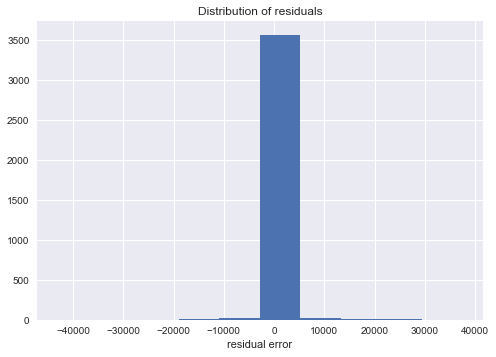

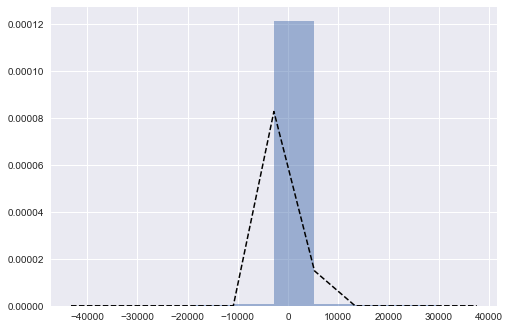

MSE of every fold with K=10:  [ 8916998.6769095   2285255.48430856  9796809.3220588   4775879.50573216
  8007858.68605232  6058032.6118      2584100.67857956  9278218.21789665
  5212091.89267078  7628415.05181295]
Mean of 10-fold cross-validated MSE: 6454366.01 (+/- 5133436.95)


In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import pylab as P
import numpy as np

#model packages
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import cross_val_score, cross_val_predic

#evaluate packages
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

#validation curve
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

# learning curve
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

dataset = pd.read_csv('popularitybot_datamodel2.csv')
dataset.isnull().any()
dataset.head()
dataset.describe()


#pre-processing features
language_content_score= dataset.language_content_score.values.reshape((len(dataset.language_content_score), 1))
language_content_magnitude  = dataset.language_content_magnitude.values.reshape((len(dataset.language_content_magnitude), 1))
language_title_score  = dataset.language_title_score.values.reshape((len(dataset.language_title_score), 1))
language_title_magnitude  = dataset.language_title_magnitude.values.reshape((len(dataset.language_title_magnitude), 1))
post_domain = dataset.post_domain.values.reshape((len(dataset.post_domain), 1))
post_gilded  = dataset.post_gilded.values.reshape((len(dataset.post_gilded), 1))
post_hide_score =  dataset.post_hide_score.values.reshape((len(dataset.post_hide_score), 1))
post_subreddit =  dataset.post_subreddit.values.reshape((len(dataset.post_subreddit), 1))
post_is_reddit_media_domain =  dataset.post_is_reddit_media_domain.values.reshape((len(dataset.post_is_reddit_media_domain), 1))
post_num_comments =  dataset.post_num_comments.values.reshape((len(dataset.post_num_comments), 1))
post_num_crossposts =  dataset.post_num_crossposts.values.reshape((len(dataset.post_num_crossposts), 1))
post_over_18 =  dataset.post_over_18.values.reshape((len(dataset.post_over_18), 1))
user_comment_karma =  dataset.user_comment_karma.values.reshape((len(dataset.user_comment_karma), 1))
user_is_gold =  dataset.user_is_gold.values.reshape((len(dataset.user_is_gold), 1))
user_is_mod =  dataset.user_is_mod.values.reshape((len(dataset.user_is_mod), 1))
user_link_karma =  dataset.user_link_karma.values.reshape((len(dataset.user_link_karma), 1))
user_verified =  dataset.user_verified.values.reshape((len(dataset.user_verified), 1))
vision_blue =  dataset.vision_blue.values.reshape((len(dataset.vision_blue), 1))
vision_green =  dataset.vision_green.values.reshape((len(dataset.vision_green), 1))
vision_red =  dataset.vision_red.values.reshape((len(dataset.vision_red), 1))
post_age =  dataset.post_age.values.reshape((len(dataset.post_age), 1))



#hot encode categorical variable
enc = preprocessing.OneHotEncoder()
enc.fit(post_domain)
transformed_post_domain  = enc.transform(post_domain).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(post_gilded)
transformed_post_gilded  = enc.transform(post_gilded).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(post_hide_score)
transformed_post_hide_score = enc.transform(post_hide_score).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(post_subreddit)
transformed_post_subreddit = enc.transform(post_subreddit).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(post_is_reddit_media_domain)
transformed_post_is_reddit_media_domain = enc.transform(post_is_reddit_media_domain).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(post_over_18)
transformed_post_over_18 = enc.transform(post_over_18).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(user_is_gold)
transformed_user_is_gold= enc.transform(user_is_gold).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(user_is_mod)
transformed_user_is_mod = enc.transform(user_is_mod).toarray()

enc = preprocessing.OneHotEncoder()
enc.fit(user_verified)
transformed_user_verified  = enc.transform(user_verified).toarray()


# prepare datasets to be fed in the regression model
#predict post_score given all other EV
CV =  dataset.post_score.values.reshape((len(dataset.post_score), 1))
data = np.concatenate((language_content_score,language_content_magnitude,language_title_score,language_title_magnitude,transformed_post_domain,transformed_post_gilded,transformed_post_hide_score,transformed_post_subreddit,transformed_post_is_reddit_media_domain,post_num_comments,post_num_crossposts,transformed_post_over_18,user_comment_karma,transformed_user_is_gold,transformed_user_is_mod,user_link_karma,transformed_user_verified,vision_blue,vision_green,vision_red,post_age,), axis=1)
print("The processed dataset: ", np.concatenate((data, CV), axis=1))

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data, CV)

# get the predictions on the training data
predicted_results = regr.predict(data)

print("Results:")
# The coefficients (mis, b) of y = misxis + b
print('Coefficients: \n', regr.coef_)
print('Intercept (b): \n', regr.intercept_)

print("Mean residual sum of squares = %.2f"
      % np.mean((regr.predict(data) - CV) ** 2))
print('R2 = %.2f' % regr.score(data,CV))


# to see how the residual errors behave
residual_error = CV - predicted_results
print("Mean of residuals =", np.mean(residual_error))
print("Standard deviation of residuals =", np.std(residual_error))


# distribution of residuals
plt.figure(6)
plt.hist(residual_error)
plt.title("Distribution of residuals")
plt.xlabel("residual error")
plt.show()

# distribution of residuals with normal distribution
plt.figure(7)
n, bins, patches = plt.hist(residual_error, 10, normed=1,  alpha = 0.5)
y_pdf = P.normpdf(bins, np.mean(residual_error), np.std(residual_error))
l = P.plot(bins, y_pdf, 'k--', linewidth=1.5)
plt.show()


#calculating 10 fold corss validation results
model = linear_model.LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(model, data, CV, scoring = 'neg_mean_squared_error', cv=kf)
print("MSE of every fold with K=10: ", abs(scores))
print("Mean of 10-fold cross-validated MSE: %0.2f (+/- %0.2f)" % (abs(scores.mean()), scores.std() * 2))
